In [1]:
# stdlib imports
from datetime import datetime

# Third party imports
import matplotlib.pyplot as plt

# Local imports
from libcomcat.search import count, get_event_by_id, search

# Search Overview
----
This notebook documents the possible ways to search for events using libcomcat. For this example, the Northridge earthquake and it's subsequent aftershocks will be considered.

## Contents
----
- [Search](#Search)
    - [Searches with Time](#Searches-with-Time)
    - [Searches with Location](#Searches-with-Location)
    - [Searches with Magnitude and Intensity](#Searches-with-Magnitude-and-Intensity)
    - [Other Options](#Other-Options)
- [Count](#Count)
- [Search by ID](#Search-by-ID)

## Search
The search command can be used to return a summary of events. Basic searches are based upon knowledge of location, time, and magnitude. 

### Searches with Time
Searching with a time will constrain when the event could have occurred. Without any location conditions, the entire globe is searched. While the web API limits to 20,000 events, the libcomcat gets around this by examining subsets of time.

In [2]:
time_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 4, 18, 12, 35))
print("Returned %s events" % len(time_events))

Returned 20989 events


The search method returns a SummaryEvent object. For more information about the SummaryEvent class, see the **Classes** notebook. Example of a returned event:

In [3]:
ci3144585 = time_events[0]
properties = ci3144585.properties
for prop in properties:
    print("%s: %s" % (prop, ci3144585[prop]))

mag: 6.7
place: 1km NNW of Reseda, CA
time: 758809855390
updated: 1518716430169
tz: None
url: https://earthquake.usgs.gov/earthquakes/eventpage/ci3144585
detail: https://earthquake.usgs.gov/fdsnws/event/1/query?eventid=ci3144585&format=geojson
felt: 10955
cdi: 8.6
mmi: 8.6
alert: None
status: reviewed
tsunami: 0
sig: 1551
net: ci
code: 3144585
ids: ,cinorthrid,choy19940117123055,gcmtc011794b,ci3144585,usp00066k9,gcmt19940117123055,duputel011794b,atlas19940117123055,iscgem189275,
sources: ,ci,choy,gcmt,ci,us,gcmt,duputel,atlas,iscgem,
types: ,associate,dyfi,focal-mechanism,general-link,impact-text,moment-tensor,nearby-cities,origin,phase-data,shakemap,trump-shakemap,
nst: 0
dmin: None
rms: 0.31
gap: 29.7
magType: mw
type: earthquake
title: M 6.7 - 1km NNW of Reseda, CA


The options allowed in the search method mirror those on the [**Search Earthquake Catalog** page](https://earthquake.usgs.gov/earthquakes/search/). The bounding box search is a way of recreating the geographic region search.

Bounding Box returned 182 events
0.05 degree radius returned 28 events
2 kilometer radius returned 7 events
Depth returned 1 events


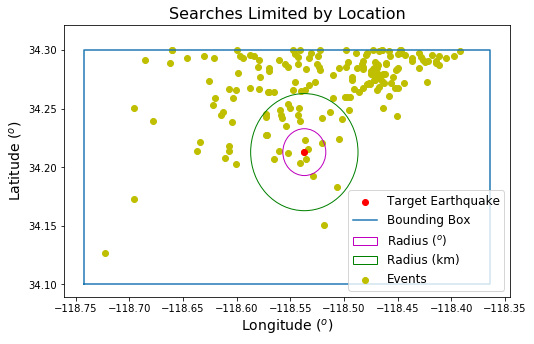

In [4]:
## Bounding Box
box_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   minlatitude=34.1, maxlatitude=34.3, minlongitude=-118.742, maxlongitude=-118.364)
print("Bounding Box returned %s events" % len(box_events))
event_lat = [e.latitude for e in box_events]
event_lon = [e.longitude for e in box_events]

## Degree Radius
deg_radius_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   maxradius=0.05, latitude=34.213, longitude=-118.537)
print("0.05 degree radius returned %s events" % len(deg_radius_events))

##  Radius
km_radius_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   maxradiuskm=2, latitude=34.213, longitude=-118.537)
print("2 kilometer radius returned %s events" % len(km_radius_events))


## Depth
depth_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   maxradiuskm=2, latitude=34.213, longitude=-118.537, maxdepth=15)
print("Depth returned %s events" % len(depth_events))


fig, ax = plt.subplots(figsize=(8, 5)) # note we must use plt.subplots, not plt.subplot
eq = ax.scatter(event_lon, event_lat, color='y', label="Events")
aoi = ax.scatter(-118.537, 34.213, color='r', label='Target Earthquake')
bb = ax.plot([-118.742, -118.364, -118.364, -118.742, -118.742], [34.1, 34.1, 34.3, 34.3, 34.1],
       label='Bounding Box')
circle1 = plt.Circle((-118.537, 34.213), 0.02, color='m', fill=False,
        label='Radius ($^o$)')
circle2 = plt.Circle((-118.537, 34.213), 0.05, color='g', fill=False,
                    label='Radius (km)')

ax.add_artist(circle1)
ax.add_artist(circle2)
ax.set_xlabel(r'Longitude ($^o$)', fontsize=14)
ax.set_ylabel(r'Latitude ($^o$)', fontsize=14)
ax.legend(handles=[aoi, bb[0], circle1, circle2, eq], fontsize=12, loc=4)
ax.set_title('Searches Limited by Location', fontsize=16)
plt.show()

### Searches with Magnitude and Intensity
Search results can be limited using descriptors of magnitude.

**Magnitude**
A minimum and maximum magnitude can be defined.

**Alert Level**
This defines the PAGER alert level. Valid options include "green", "yellow", "orange", and "red". *Note*: This option does not act as a threshold to return events with alert levels above and below the defined level; only those events with the exact alert level will be returned.

**Maximum MMI**
This defines the Maximum Modified Mercalli Intensity reported by ShakeMap.

**Significance** This limits events by their minimum and maximum significance.

**CDI** The minimum and maximum Community Determined Intensity that is reported by DYFI is used as a threshold. *Note*: A DYFI report is required for this option, otherwise no events are returned. Options are limited between 0 and 12.

**Minimum Felt** The minimum number of DYFI responses is used as the threshold. *Note*: A DYFI report is required for this option, otherwise no events are returned.



Magnitude returned 8 events
Alert level returned 0 events
Significance returned 4 events
CDI returned 0 events


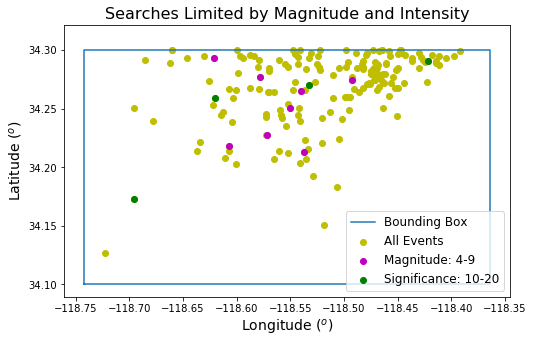

In [5]:
## Using the bounding box option and limited by magnitude and Intensity
## Magnitude
mag_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   minlatitude=34.1, maxlatitude=34.3, minlongitude=-118.742, maxlongitude=-118.364,
                   minmagnitude=4, maxmagnitude=8)
print("Magnitude returned %s events" % len(mag_events))

## Alert Level
alert_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   minlatitude=34.1, maxlatitude=34.3, minlongitude=-118.742, maxlongitude=-118.364,
                   alertlevel="green")
print("Alert level returned %s events" % len(alert_events))

## Significance
significance_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   minlatitude=34.1, maxlatitude=34.3, minlongitude=-118.742, maxlongitude=-118.364,
                   minsig=10, maxsig=20)
print("Significance returned %s events" % len(significance_events))

## CDI
cdi_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   minlatitude=34.1, maxlatitude=34.3, minlongitude=-118.742, maxlongitude=-118.364,
                   mincdi=5, maxcdi=7)
print("CDI returned %s events" % len(cdi_events))

fig, ax = plt.subplots(figsize=(8, 5)) # note we must use plt.subplots, not plt.subplot
eq = ax.scatter(event_lon, event_lat, color='y', label="All Events")
bb = ax.plot([-118.742, -118.364, -118.364, -118.742, -118.742], [34.1, 34.1, 34.3, 34.3, 34.1],
       label='Bounding Box')
circle1 = plt.Circle((-118.537, 34.213), 0.02, color='m', fill=False,
        label='Radius ($^o$)')
mag = ax.scatter([e.longitude for e in mag_events], [e.latitude for e in mag_events],
           color='m', label='Magnitude: 4-9')
sig = ax.scatter([e.longitude for e in significance_events], [e.latitude for e in significance_events],
           color='g', label='Significance: 10-20')
ax.set_xlabel(r'Longitude ($^o$)', fontsize=14)
ax.set_ylabel(r'Latitude ($^o$)', fontsize=14)
ax.legend(handles=[bb[0], eq, mag, sig], fontsize=12, loc=4)
ax.set_title('Searches Limited by Magnitude and Intensity', fontsize=16)
plt.show()



### Other Options

Other options related to logistical limits include:

- **catalog**: Only return events corresponding to the specified catalog.
- **enable_limit**: While comcat works around COMCAT's 20,000 search limit. The workaround can be turned off using this option.
- **eventtype**: Limits to specific type. Using "earthquake" will filter all events that are not earthquakes.
- **host**: A host other than the default (earthquake.usgs.gov)
- **limit**: Limit the number of events to this number.
- **mingap**: Limit to events with no less than this azimuthal gap. (Values must be between 0 and 360)
- **offset**: This returns the result starting at the event count specified.
- **orderby**: This sorts the event by an origin or magnitude parameter. Options include "time", "time-asc", "magnitude", and "magnitude-asc". Options without "asc" are returned in descending order. 
- **productcode**: Returns an event with the associated product code (Example: nn00458749).
- **producttype**: This returns only those events with the corresponding product type. (Examples: moment-tensor, focal-mechanism, shakemap, losspager, dyfi)
- **reviewstatus**: Limits events by their review status. Options include "automatic" and "reviewed"
- **updateafter**: Only events updated after a specific time will be returned. The input should be a python datetime.

Example of orderby:


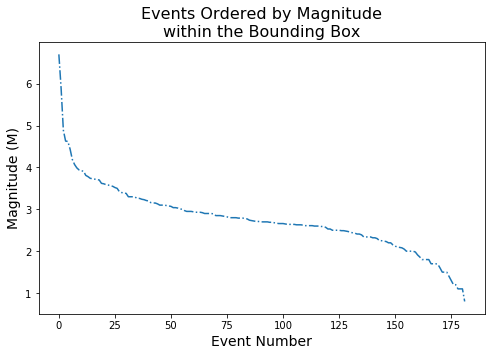

In [6]:
box_events = search(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   minlatitude=34.1, maxlatitude=34.3, minlongitude=-118.742, maxlongitude=-118.364,
                   orderby='magnitude')
magnitude = [e.magnitude for e in box_events]

fig, ax = plt.subplots(figsize=(8, 5)) # note we must use plt.subplots, not plt.subplot
ax.plot(range(len(magnitude)), magnitude, '-.')
ax.set_xlabel(r'Event Number', fontsize=14)
ax.set_ylabel(r'Magnitude (M)', fontsize=14)
ax.set_title('Events Ordered by Magnitude\nwithin the Bounding Box', fontsize=16)
plt.show()

## Count
The count method works in the same way, with the same parameters as the search option. However, this method returns the number of events rather than a SummaryEvent object.

In [7]:
number_events = count(starttime=datetime(1994, 1, 17, 12, 30), endtime=datetime(1994, 1, 18, 12, 35),
                   minlatitude=34.1, maxlatitude=34.3, minlongitude=-118.742, maxlongitude=-118.364,
                   orderby='magnitude')
print("%s events." % number_events)

182 events.


## Search by ID
If you already know the event ID, you can search with it. Since only one event will be accessed, a DetailEvent object will be returned. This means that a full list of products will be included.

Options other than the event id include:
- **catalog**: Only return events corresponding to the specified catalog.
- **host**: A host other than the default (earthquake.usgs.gov)
- **includedeleted**: Includes deleted products.
- **includesuperseded**: Includes superseded product (example: an older version of a finite-fault product). This automatically includes deleted products.


In [8]:
earthquake = get_event_by_id('ci3144585')

print("Included products: %s " % earthquake.products)    

Included products: ['associate', 'dyfi', 'focal-mechanism', 'general-link', 'impact-text', 'moment-tensor', 'nearby-cities', 'origin', 'phase-data', 'shakemap', 'trump-shakemap'] 


The options to include `superseded` and `includedeleted` are incredibly important if older versions of products need to be analyzed.